### **0. Import libraries**

In [2]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
#from xgboost import XGBRegressor
from scipy.special import huber
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
RANDOM_STATE = 2023
TEST_SIZE = 0.2
#pip install --pre --extra-index - this for extracting features

In [3]:
#from google.colab import drive
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/'

In [4]:
os.getcwd()

'/home/ec2-user'

In [5]:
path='/home/ec2-user/finalish_df_3.csv'

In [6]:
df=pd.read_csv(path)

In [7]:
df.head()

,Unnamed: 0,ZCTA,year_month,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,...,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
0,0,89010,199101,0.014313,2.171619,2.193307,2.237374e-03,0.024999,24.261588,12.450976,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
1,1,89010,199102,0.003401,1.473353,0.522705,1.519277e-03,0.017402,16.875655,11.255854,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
2,2,89010,199104,0.024555,4.317860,3.803710,4.474625e-03,0.053075,51.209927,7.899268,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
3,3,89010,199106,0.000017,0.000382,0.002707,3.951177e-07,0.000100,0.096979,8.160244,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446
4,4,89010,199107,0.007432,0.586126,1.136627,5.962933e-04,0.006781,6.661194,9.101220,...,1.8,4.5,2.4,275.6,14.272763,56.603842,13.526364,14.514991,3.99958,8.781446


In [8]:
#Understand the data
df.describe()

,Unnamed: 0,ZCTA,year_month,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,...,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
count,212290.000000,212290.000000,212290.000000,2.122900e+05,2.122900e+05,212289.000000,2.122890e+05,212289.000000,2.122900e+05,209430.000000,...,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000,208302.000000
mean,106144.500000,93654.382119,199997.161538,7.379691e-02,1.613640e+02,11.416830,1.670685e-01,1.811786,1.749956e+03,11.488080,...,7.773606,7.295195,8.075401,20221.132644,23.626606,76.626839,8.398440,7.922138,7.063262,6.519049
std,61282.988661,1824.384733,718.468337,1.471526e-01,6.057579e+02,22.030870,6.348926e-01,6.735416,6.427066e+03,6.579837,...,4.731613,4.019645,4.752944,20098.126808,16.009667,14.035089,5.470566,6.049318,4.378647,4.703655
min,0.000000,89010.000000,199101.000000,7.029915e-09,1.604281e-07,0.000001,1.605966e-10,0.000004,4.316296e-03,0.100000,...,0.000000,0.000000,0.000000,3.000000,0.010000,15.539960,0.010000,0.010000,0.010000,0.010000
25%,53072.250000,92257.000000,199409.000000,7.334696e-03,1.414858e+00,1.127655,1.448269e-03,0.016857,1.646383e+01,6.729181,...,5.100000,5.100000,5.300000,1644.300000,11.325125,69.942457,5.829545,5.228259,4.949480,4.361725
50%,106144.500000,93650.000000,199809.500000,2.520847e-02,1.335103e+01,3.882968,1.372767e-02,0.155041,1.506759e+02,9.910000,...,7.100000,7.000000,7.600000,15445.000000,19.597528,80.708626,7.988409,7.174050,6.754290,6.129613
75%,159216.750000,95377.000000,200311.000000,7.509900e-02,9.702398e+01,11.589862,1.001786e-01,1.109923,1.075490e+03,14.806859,...,9.400000,8.800000,10.000000,33549.300000,32.814354,86.996830,9.959545,9.208287,8.464110,7.761510
max,212289.000000,97635.000000,201612.000000,2.209820e+01,9.767446e+04,1719.864507,1.039024e+02,1093.379388,1.027844e+06,50.858000,...,67.600000,44.700000,81.300000,106360.000000,95.000000,95.000000,95.000000,95.000000,67.737870,95.000000


In [9]:
#split yearmonth into year and month
df=df.assign(date=df.loc[:,"year_month"].astype("string").str[0:4].astype("Datetime64").dt.year, month=df.loc[:,"year_month"].astype("string").str[4:])

In [10]:
#drop irrelevant columns
df1=df.drop(['Unnamed: 0','date'],axis=1)

In [11]:
#checking for NAs
k1=df1.isnull().any(axis=0).sum()
k2=np.count_nonzero(df1.isnull())
print("number of rows with nulls: ",k1)
print("Total number of nulls: ",k2)
print(df1.shape)

number of rows with nulls:  24
Total number of nulls:  77247
(212290, 32)


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212290 entries, 0 to 212289
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ZCTA                               212290 non-null  int64  
 1   year_month                         212290 non-null  int64  
 2   ins_1_no_bin_raw                   212290 non-null  float64
 3   ins_2_add_acres_raw                212290 non-null  float64
 4   ins_3_norms                        212289 non-null  float64
 5   ins_4_add_acres_norms              212289 non-null  float64
 6   ins_5_norm_bins_acres              212289 non-null  float64
 7   ins_6_bins_raw                     212290 non-null  float64
 8   zip_pm25                           209430 non-null  float64
 9   zip_elevation                      210990 non-null  float64
 10  elevation_difference               210990 non-null  float64
 11  zip_wspd                           2122

In [13]:
#drop all rows with null values
df1.dropna(inplace=True)
df1.isnull().sum()
print(df1.shape)

(206774, 32)


In [14]:
#convert zipcode to string
df1.loc[:,'ZCTA']=df1.loc[:,'ZCTA'].astype('string')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206774 entries, 0 to 212289
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ZCTA                               206774 non-null  string 
 1   year_month                         206774 non-null  int64  
 2   ins_1_no_bin_raw                   206774 non-null  float64
 3   ins_2_add_acres_raw                206774 non-null  float64
 4   ins_3_norms                        206774 non-null  float64
 5   ins_4_add_acres_norms              206774 non-null  float64
 6   ins_5_norm_bins_acres              206774 non-null  float64
 7   ins_6_bins_raw                     206774 non-null  float64
 8   zip_pm25                           206774 non-null  float64
 9   zip_elevation                      206774 non-null  float64
 10  elevation_difference               206774 non-null  float64
 11  zip_wspd                           2067

In [16]:
#select instruments
cols=['year','ins_1_no_bin_raw','ins_2_add_acres_raw', 'ins_3_norms', 'ins_4_add_acres_norms','ins_5_norm_bins_acres','ins_6_bins_raw',]
df1a=df1.loc[:,cols]

In [17]:
#make year_month an index and sort values by year_month
df1.loc[:,"year_month"]=df1.loc[:,"year_month"].astype(float)
df1.sort_values(by=['year_month'],inplace=True)
df1.set_index('year_month', inplace=True)
#df1.loc[:,"year"]=df.loc[:,"year"].astype(float)

In [18]:
#df1.head()

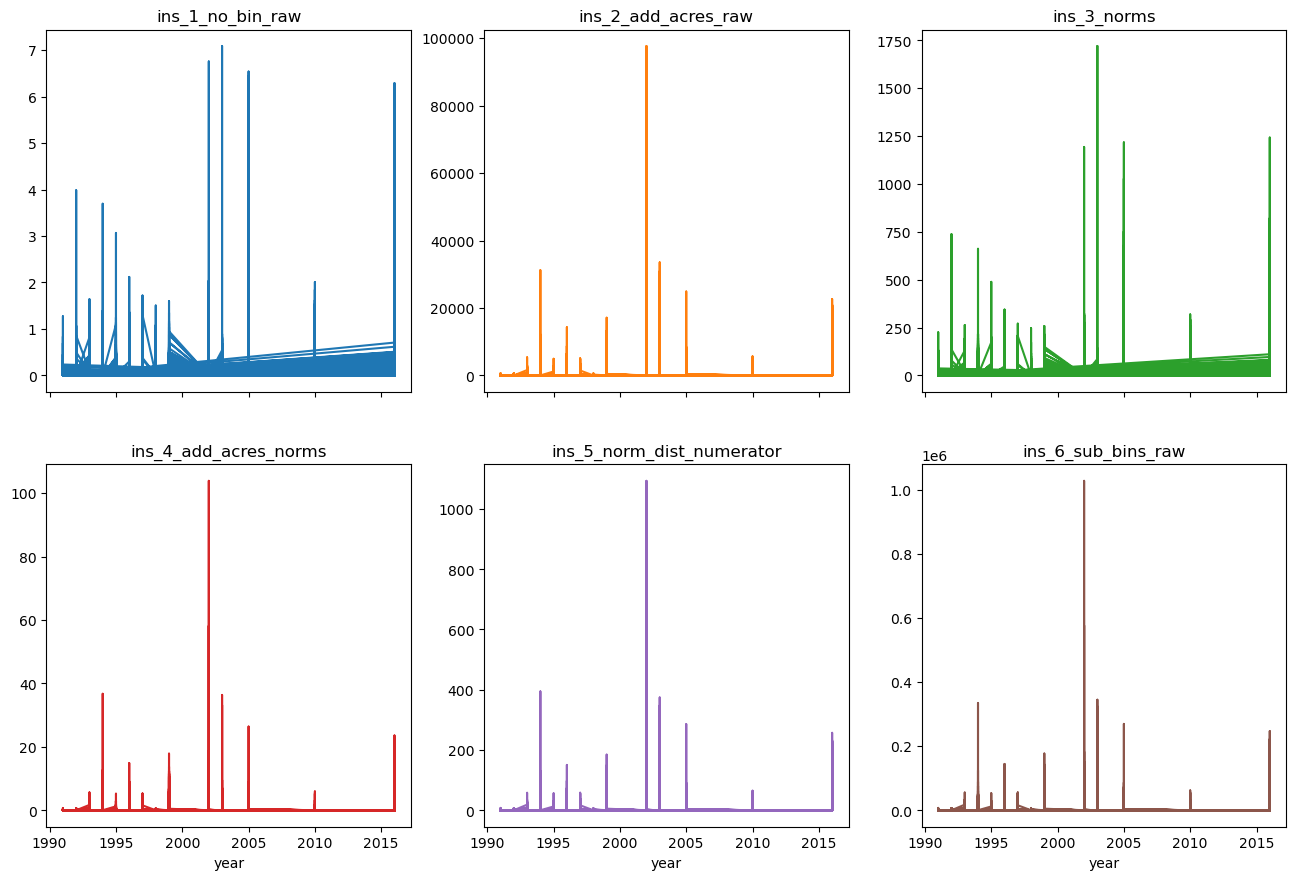

In [19]:
df1a.set_index("year").plot(
    figsize=(16,16),
    subplots=True,
    layout=(3,3),
    sharey=False,
    legend=False,
    title=['ins_1_no_bin_raw','ins_2_add_acres_raw', 'ins_3_norms', 'ins_4_add_acres_norms','ins_5_norm_dist_numerator','ins_6_sub_bins_raw'],
);

In [20]:
#corr_df=df1.corr().drop('ZCTA',axis=1).drop('ZCTA',axis=0)
corr_df=df1.corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_4694/4148240826.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,ins_1_no_bin_raw,ins_2_add_acres_raw,ins_3_norms,ins_4_add_acres_norms,ins_5_norm_bins_acres,ins_6_bins_raw,zip_pm25,zip_elevation,elevation_difference,zip_wspd,year,households_count,mean_income_per_household,median_income_per_household,percent_pop_age_10to14,percent_pop_age_5to9,percent_pop_age_under_5,percent_pop_female_age_10to14,percent_pop_female_age_5to9,percent_pop_female_age_under_5,percent_pop_male_age_5to9,percent_pop_male_age_under_5,total_population,percent_bach_deg_grad_new,percent_high_school_grad_new,percent_pop_age_15to19_new,percent_pop_female_age_15to19_new,percent_pop_male_age_10to14_new,percent_pop_male_age_15to19_new
ins_1_no_bin_raw,1.00,0.32,1.00,0.32,0.32,0.32,-0.03,-0.00,-0.05,0.21,0.27,0.06,0.11,0.11,0.01,-0.01,-0.01,0.00,-0.02,-0.02,-0.01,-0.01,0.07,0.02,-0.03,-0.04,-0.03,0.01,-0.04
ins_2_add_acres_raw,0.32,1.00,0.31,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.14,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.03
ins_3_norms,1.00,0.31,1.00,0.31,0.32,0.32,-0.03,-0.00,-0.05,0.21,0.27,0.06,0.11,0.11,0.01,-0.01,-0.01,0.00,-0.02,-0.02,-0.01,-0.01,0.07,0.02,-0.03,-0.04,-0.03,0.01,-0.04
ins_4_add_acres_norms,0.32,1.00,0.31,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.14,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.02
ins_5_norm_bins_acres,0.32,1.00,0.32,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.15,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.01,-0.03,-0.02,-0.00,-0.03
ins_6_bins_raw,0.32,1.00,0.32,1.00,1.00,1.00,0.00,0.00,-0.02,0.09,0.15,0.03,0.06,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.03,0.02,-0.01,-0.03,-0.02,-0.00,-0.03
zip_pm25,-0.03,0.00,-0.03,0.00,0.00,0.00,1.00,-0.43,0.46,0.00,-0.33,0.44,-0.05,-0.04,0.03,0.03,0.10,-0.01,-0.04,-0.00,-0.01,0.06,0.44,0.02,-0.18,0.09,0.02,-0.03,0.04
zip_elevation,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.43,1.00,-0.97,-0.29,-0.00,-0.40,-0.17,-0.15,0.00,-0.00,-0.07,0.07,0.08,0.03,0.03,-0.01,-0.38,-0.10,0.18,0.00,0.08,0.07,0.02
elevation_difference,-0.05,-0.02,-0.05,-0.02,-0.02,-0.02,0.46,-0.97,1.00,0.24,-0.09,0.38,0.13,0.11,0.00,0.01,0.08,-0.06,-0.07,-0.02,-0.02,0.02,0.36,0.08,-0.18,0.02,-0.06,-0.07,-0.00
zip_wspd,0.21,0.09,0.21,0.09,0.09,0.09,0.00,-0.29,0.24,1.00,-0.01,0.15,0.16,0.17,-0.02,0.00,0.06,-0.03,-0.03,0.01,0.02,0.03,0.13,0.16,-0.02,-0.02,-0.03,-0.04,-0.03


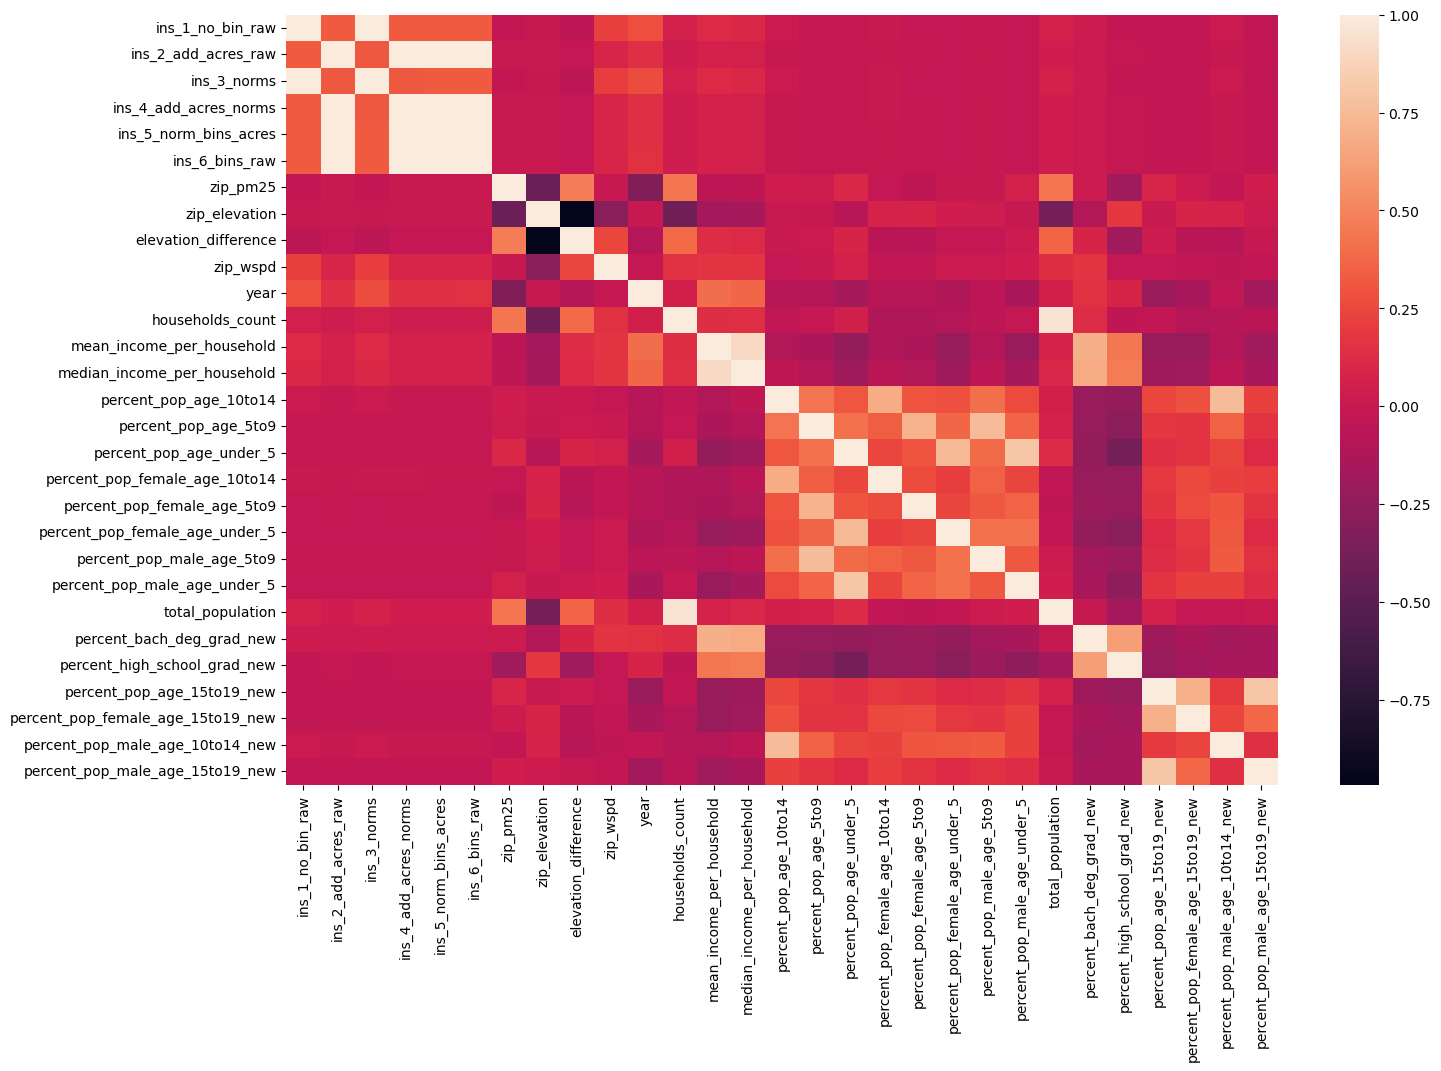

In [21]:
fig, ax = plt.subplots(figsize=(16, 10))
hmap=sns.heatmap(corr_df)

/tmp/ipykernel_4694/3172025710.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5,0:5]
/tmp/ipykernel_4694/3172025710.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))


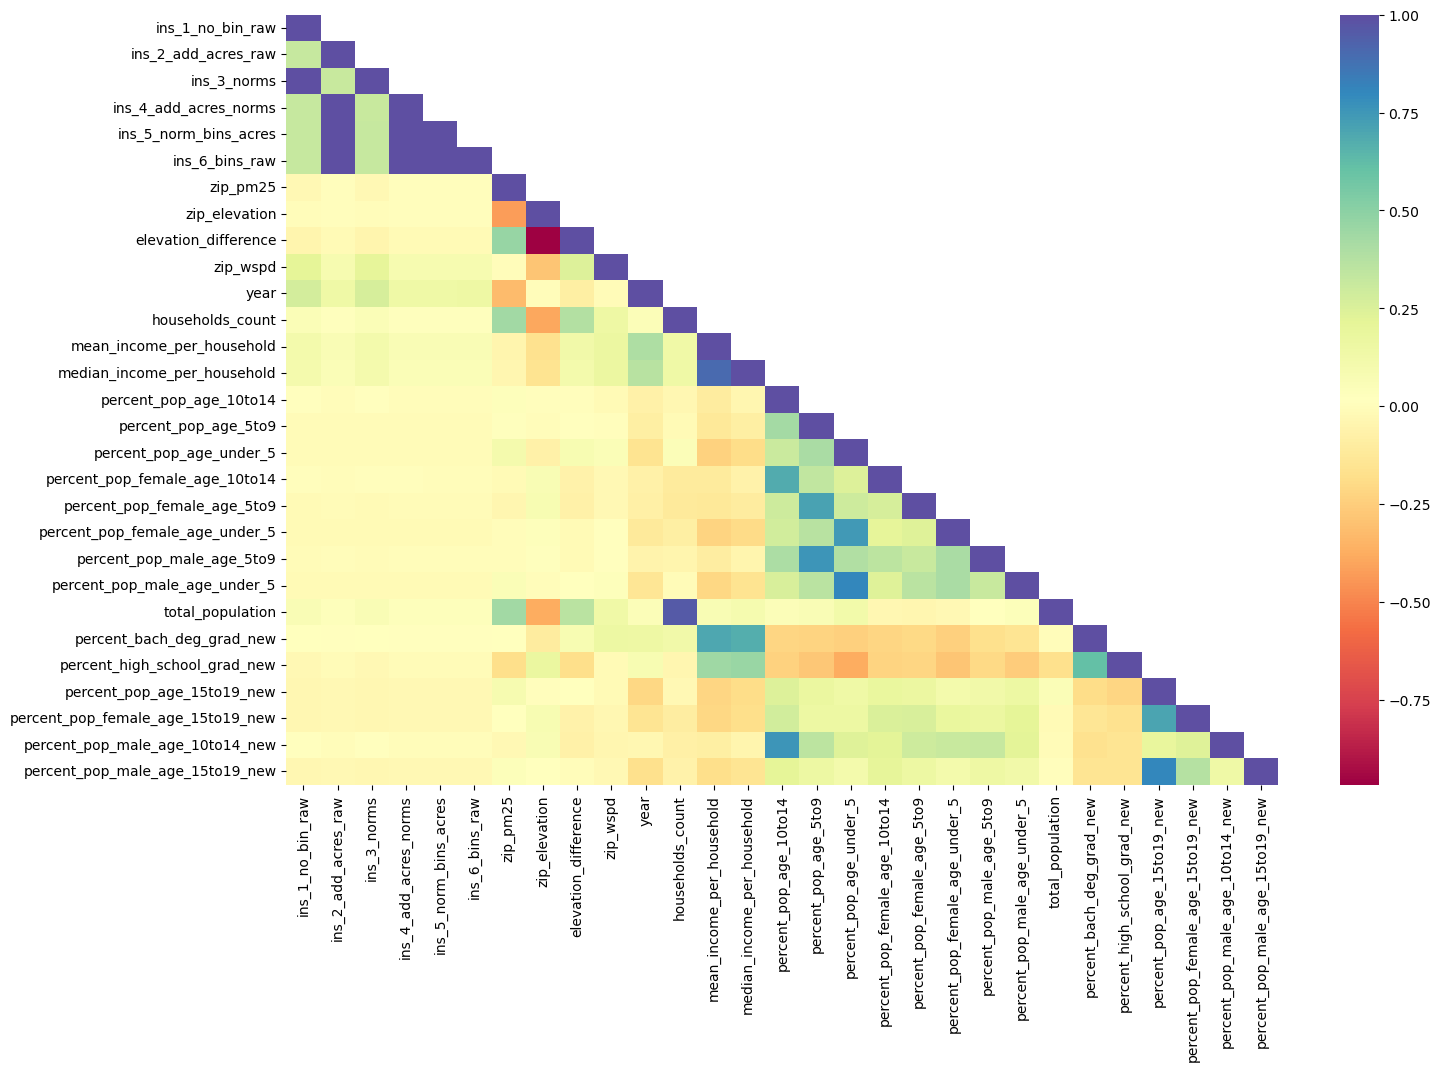

In [22]:
np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

fig, ax = plt.subplots(figsize=(16, 10))
hmap=sns.heatmap(df_lt,cmap="Spectral")

<AxesSubplot:ylabel='Frequency'>

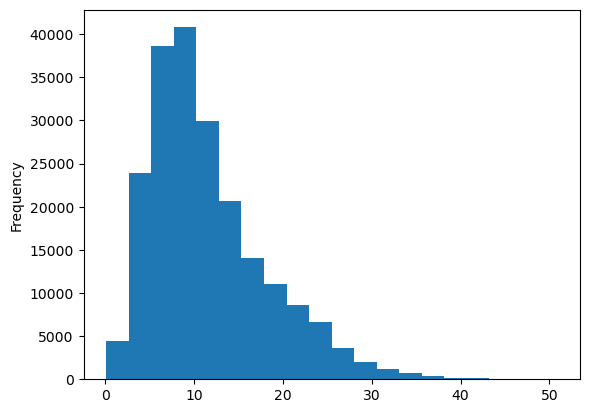

In [23]:
df1.loc[:,"zip_pm25"].plot.hist(bins=20)

In [27]:
#select columns for pairplots
#df1_sns=df1.drop("year_month", axis=1)
#sns.pairplot(df1_sns)

## **Notes on Baseline Regression**
### Preferred instrument: instrument 1 
### Linear regression
### Preferred features: see blow xvar1 list contains the preferred features 
### Other features dropped based on correlation matrix and Lasso regression
### R-squared=69%: based on the model with instrument1 and the preferred features (xvar)
### Feature importance is shown in the charts below: Seasonality(month) seems to be a major contributor in addition to zipcode specific factors and elevation
### See below for metrics: Table of metrics and coefficients based on magnitude

## Baseline Linear Regression

In [246]:

#identify the x and y variables/columns
#instruments=['ins_1_no_bin_raw', 'ins_2_add_acres_raw', 'ins_3_norms','ins_4_add_acres_norms', 'ins_5_norm_dist_numerator','ins_6_sub_bins_raw']
#replace any of the instruments in the xvar below to create a new xvar and run the function

xvar=['ins_1_no_bin_raw', 'zip_elevation',
       'elevation_difference', 'zip_wspd', 'year', 'households_count',
       'mean_income_per_household', 'median_income_per_household',
       'percent_pop_age_10to14', 'percent_pop_age_5to9',
       'percent_pop_age_under_5', 'percent_pop_female_age_10to14',
       'percent_pop_female_age_5to9', 'percent_pop_female_age_under_5',
       'percent_pop_male_age_5to9', 'percent_pop_male_age_under_5',
       'total_population', 'percent_bach_deg_grad_new',
       'percent_high_school_grad_new', 'percent_pop_age_15to19_new',
       'percent_pop_female_age_15to19_new', 'percent_pop_male_age_10to14_new',
       'percent_pop_male_age_15to19_new', 'ZCTA','month']
        

xvar1=['ins_1_no_bin_raw','zip_elevation','zip_wspd', 'year','median_income_per_household','percent_pop_age_10to14', 'percent_pop_age_5to9','percent_pop_age_under_5','percent_bach_deg_grad_new','percent_high_school_grad_new', 'percent_pop_age_15to19_new','month','ZCTA']


yvar=['zip_pm25']


X=(df1.loc[:,xvar1])
y=(df1.loc[:,yvar])

In [247]:
#Preprocess numeric columns
numeric_features=X.select_dtypes(exclude="string").columns
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

In [248]:
#Preprocess categorical columns
categorical_features=X.select_dtypes(include="string").columns
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [249]:
#define the estimator
estimator = TransformedTargetRegressor(regressor=LinearRegression(),func=np.log1p,inverse_func=np.expm1)

In [250]:
#specify gridsearch
tscv = TimeSeriesSplit(n_splits = 5)
gridsearchcv = GridSearchCV(
    estimator,
    param_grid={'regressor__fit_intercept': [True, False]},
    cv=tscv,
    scoring=('r2'),
    return_train_score=True,
    refit='r2',
    n_jobs=-1
)
#scoring=('r2', 'neg_mean_absolute_error'),

In [251]:
#combine two preprocess steps with column transformer
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),('cat',categorical_transformer,categorical_features)])

In [237]:
#Train the model
lr=Pipeline(steps=[('preprocessor',preprocessor),('gridsearchcv',gridsearchcv)])

In [238]:
#specify gridsearch and change cv to tscv
rscore=[]
mse_tss=[]
mae_tss=[]
rmse_tss=[]
coeffs=[]

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    results=lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_true=y_test
    mae_tss.append(mean_absolute_error(y_true, y_pred))
    mse_tss.append(mean_squared_error(y_true, y_pred,squared=True))
    rmse_tss.append(mean_squared_error(y_true, y_pred,squared=False))
    rscore.append(r2_score(y_true,y_pred))
    coeffs.append((results['gridsearchcv'].best_estimator_.regressor_.coef_))
features=lr[:-1].get_feature_names_out()

In [239]:
#table of metrics for each iteration
metrics1=list(zip(rscore,mse_tss,mae_tss,rmse_tss))
metrics=pd.DataFrame(metrics1).rename(columns={0:'R-squared',1:'MSE',2:'MAE',3:'RMSE'},index={0:'Fold1',1:'Fold2',2:'Fold3',3:'Fold4',4:'Fold5'})
metrics.loc['Average',:]=metrics.mean()
metrics.round(2)

,R-squared,MSE,MAE,RMSE
Fold1,0.68,16.25,2.84,4.03
Fold2,0.77,6.69,1.94,2.59
Fold3,0.64,15.00,2.68,3.87
Fold4,0.76,9.38,2.09,3.06
Fold5,0.61,5.96,1.81,2.44
Average,0.69,10.66,2.27,3.20


In [240]:
coeffs1=pd.DataFrame(coeffs).transpose().rename(columns={0:'Fold1', 1:'Fold2',2:'Fold3',3:'Fold4',4:'Fold5'})
features1=pd.DataFrame(features).rename(columns={0:'Features'})
cf=coeffs1.join(features1)
cf=cf.assign(Coefficients=cf.loc[:,"Fold1":"Fold5"].mean(axis=1))
cf.sort_values(by='Coefficients',ascending=False, inplace=True)


<AxesSubplot:title={'center':'Features with Relatively Low Coefficient Values'}, ylabel='Features'>

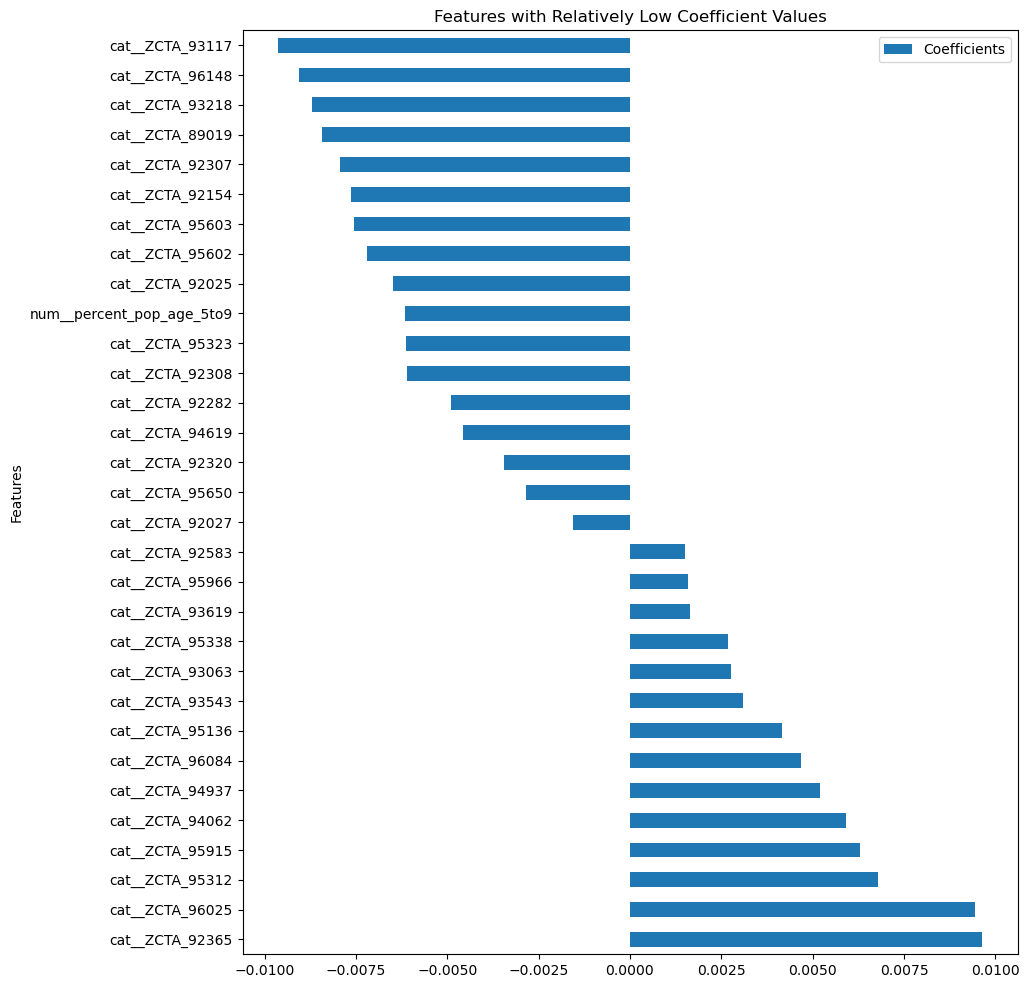

In [241]:
cf.loc[:,['Features','Coefficients']].query("Coefficients<0.01 and Coefficients >-0.01").set_index("Features").plot.barh(figsize=(10,12),title='Features with Relatively Low Coefficient Values')

<AxesSubplot:title={'center':'Features with Largest Negative Values'}, ylabel='Features'>

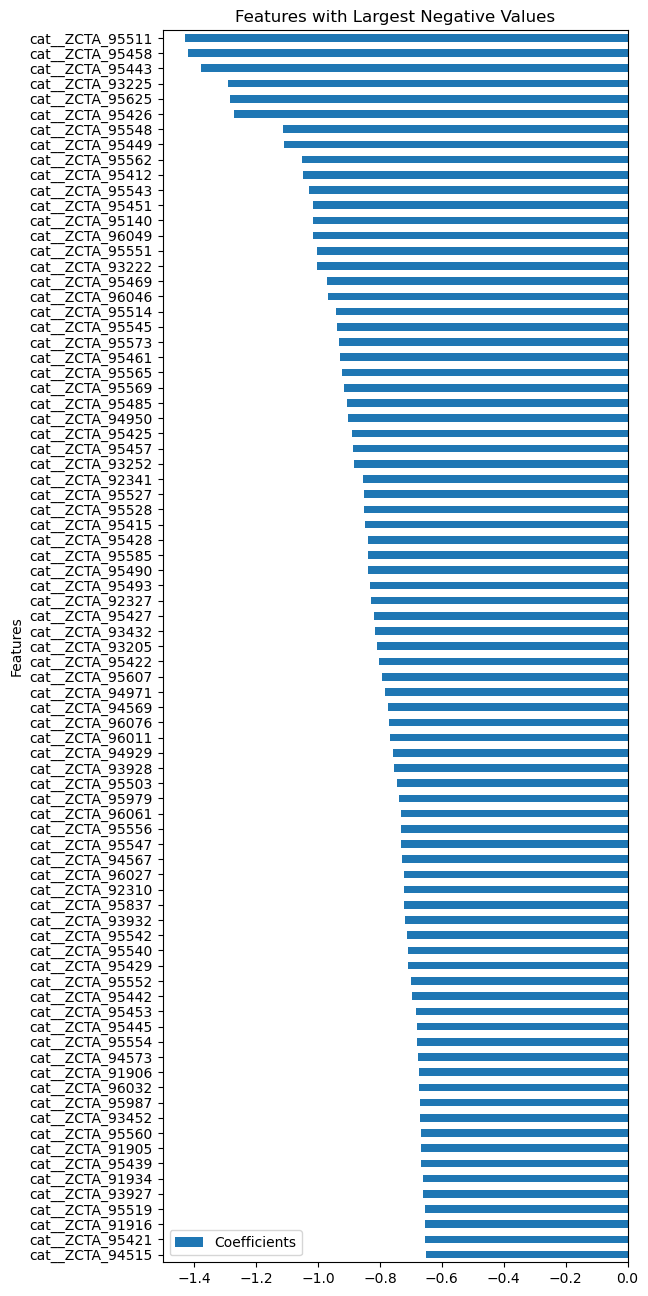

In [242]:
#Features with largest Negative Values
lb=cf.loc[:,"Coefficients"]<(cf.loc[:,"Coefficients"].quantile(0.05))
cf.loc[:,['Features','Coefficients']][lb].set_index("Features").plot.barh(figsize=(6,16),title='Features with Largest Negative Values')

    

<AxesSubplot:title={'center':'Features with Largest Positive Values'}, ylabel='Features'>

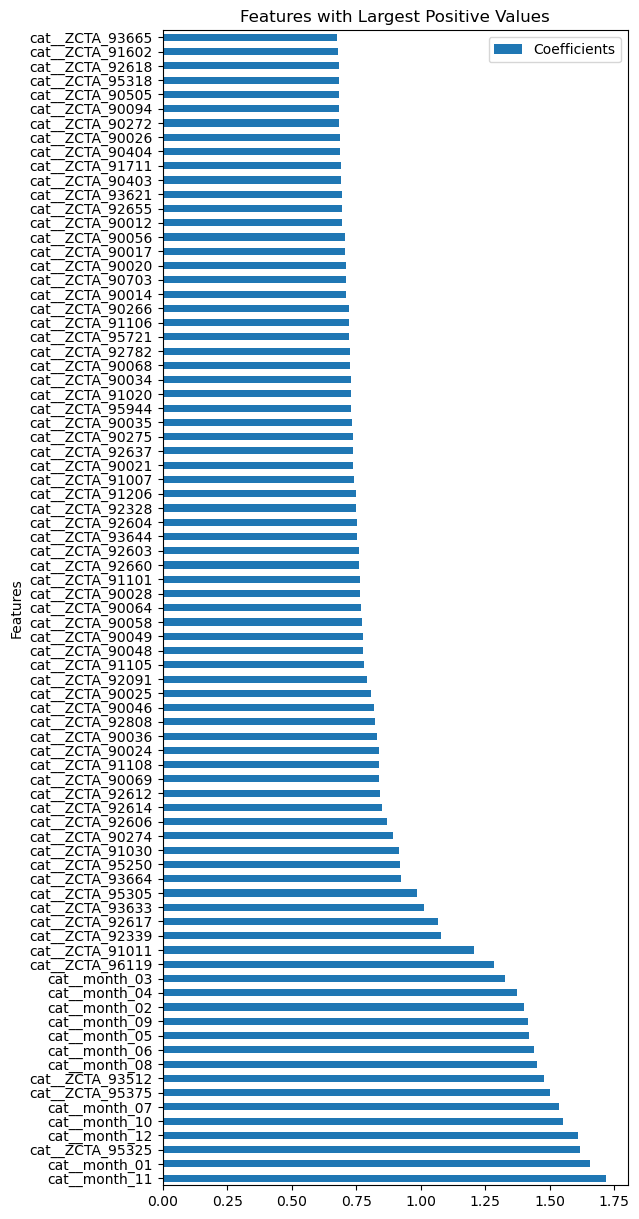

In [243]:
#Largest Positive Coefficients
ub=cf.loc[:,"Coefficients"]>(cf.loc[:,"Coefficients"].quantile(0.95))
cf.loc[:,['Features','Coefficients']][ub].set_index("Features").plot.barh(figsize=(6,15),title='Features with Largest Positive Values')